# Project on Classification of Sonar Dataset

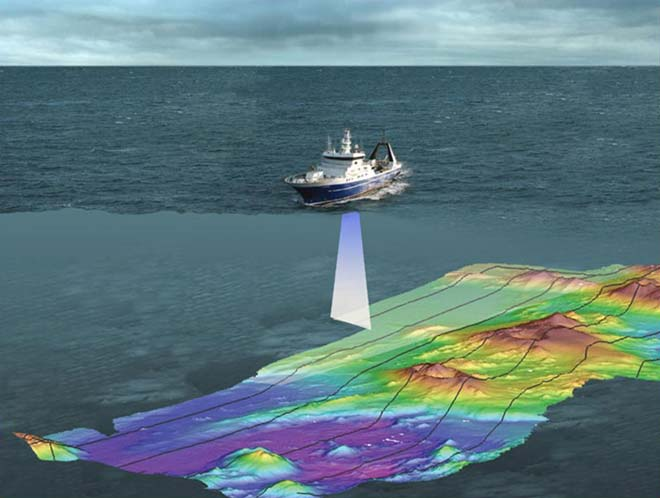

# Importing Libraries and Modules

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', names=range(0, 61), header=0)

# Comprehending the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

There are No Null values in our data.

# Checking missing values

In [31]:
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Length: 61, dtype: bool

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [11]:
x = data.iloc[:,0:-1]
x.shape

(207, 60)

Now the columns are enumerated from 0 to 60.

The last column have values for "R" and "M", wich stands for "Rock" or "Mine" observation.

We will try to predict it based on the columns from 0 to 59 while the column 60 says if its a "Rock" or "Mine" observation.

Lets check the classes balance.

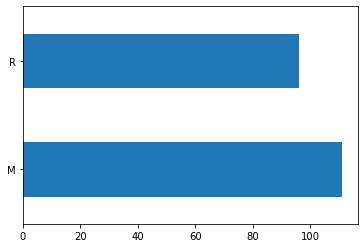

In [8]:
df[60].value_counts().plot(kind='barh')

There are not much difference between the classes proportion, so I will not apply any rebalance to it.

I choose to split the inputs (first 59 columns) and targets (column 60 dummie data) for then use it as the model inputs and outputs.

First the inputs.

In [12]:
inputs_df = df.drop(60, axis=1)
inputs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [13]:
targets_df = pd.get_dummies(df[60])
targets_df

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
202,1,0
203,1,0
204,1,0
205,1,0


For the targets we have now the columns 'R' wich stand for Rock and 'M' for Mine.

For these columns we have the values 1 for "belongs to" and 0 for "doesn't belongs to" the column class.

I choose to split it into two Series object in a way for me to test the classification results for each one.

# Data Preprocessing

In [15]:
rock_y_df = targets_df['R']
mine_y_df = targets_df['M']

We must then split our data into train and test for we to be able to measure the model generalization as we predict unseen data by the model.

This step has a great impact on the model selection stage.

I choose to predict 1 if its a mine and 0 if its a rock.

In [22]:
pca = PCA(n_components=10)
#pca=PCA(25)

In [23]:
y = data.iloc[:,-1]

In [24]:
x = pca.fit_transform(x)

# Standardizing the dataset

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
x.shape

(207, 10)

In [28]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Train and test sets split

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=22, random_state=45)
lr= LogisticRegression()

# Validation and Model Selection

In [33]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8181818181818182
[[9 2]
 [2 9]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.82      0.82      0.82        11

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.82      0.82      0.82        22



In [34]:
gnb = GaussianNB()

In [35]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8636363636363636
[[10  1]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.90      0.82      0.86        11

    accuracy                           0.86        22
   macro avg       0.87      0.86      0.86        22
weighted avg       0.87      0.86      0.86        22



In [36]:
svc = SVC()

In [37]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9545454545454546
[[11  0]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.91      0.95        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



# Decision Tree

In [38]:
dt = DecisionTreeClassifier()
# dt= DecisionTreeClassifier(criterion='entropy')

In [39]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8636363636363636
[[ 9  2]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.83      0.91      0.87        11

    accuracy                           0.86        22
   macro avg       0.87      0.86      0.86        22
weighted avg       0.87      0.86      0.86        22



# CROSS VALIDATION

In [40]:
from sklearn.model_selection import cross_val_score

gnbscores = cross_val_score(gnb, x, y, cv=5)
print(gnbscores)
print(gnbscores.mean(), gnbscores.std())

[0.42857143 0.73809524 0.43902439 0.73170732 0.3902439 ]
0.5455284552845528 0.15548626224792733


In [41]:
#from sklearn.model_selection import cross_val_score

svcscores = cross_val_score(svc, x, y, cv=5)
print(svcscores)
print(svcscores.mean(), svcscores.std())

[0.45238095 0.76190476 0.51219512 0.75609756 0.3902439 ]
0.5745644599303136 0.15546283624706844


In [42]:
dtscores = cross_val_score(dt, x, y, cv=5)
print(dtscores)
print(dtscores.mean(), dtscores.std())

[0.5        0.64285714 0.46341463 0.75609756 0.53658537]
0.5797909407665505 0.10661907038630425


It’s the best so far! The SVC is pretty good, the cross-validation score is the best so far. 

# Conclusion

In this project, I used Logistic Regression with polynomial features,SVC,GaussianNB(), Decision Tree, and. . Also using cross_val_score method I found SVC score using cross validation method is the best model. 

In [ ]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))